## Libraries

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\dnyan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loaded the Hotel Booking Demand dataset from Kaggle and explored key variables such as lead time, stay duration, and ADR (Average Daily Rate). Cleaned missing values and visualized distributions to understand price trends and correlations across features.

## Dataset Loading and Preprocessing

In [3]:
df_hotel = pd.read_csv("hotel_bookings.csv")
print("Shape:", df_hotel.shape)
df_hotel.head()

Shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df_hotel.info()
df_hotel.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df_hotel = df_hotel.dropna(subset=["adr"])   #Dropping rows where price is missing, ADR: Average daily rate

In [6]:
df_hotel.fillna(df_hotel.median(numeric_only=True), inplace=True)

## Basic EDA

In [7]:
print("\nUnique Hotels:", df_hotel['hotel'].unique())


Unique Hotels: ['Resort Hotel' 'City Hotel']


In [8]:
print("\nColumns:", df_hotel.columns.tolist())


Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


The histogram and heatmap highlight how ADR varies widely across bookings and confirm that features like lead time and stays have a measurable impact on price.

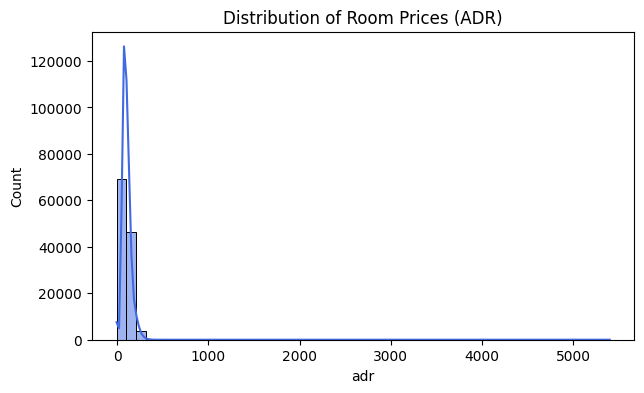

In [9]:
#price distribution
plt.figure(figsize=(7,4))
sns.histplot(df_hotel['adr'], bins=50, kde=True, color='royalblue')
plt.title("Distribution of Room Prices (ADR)")
plt.show()

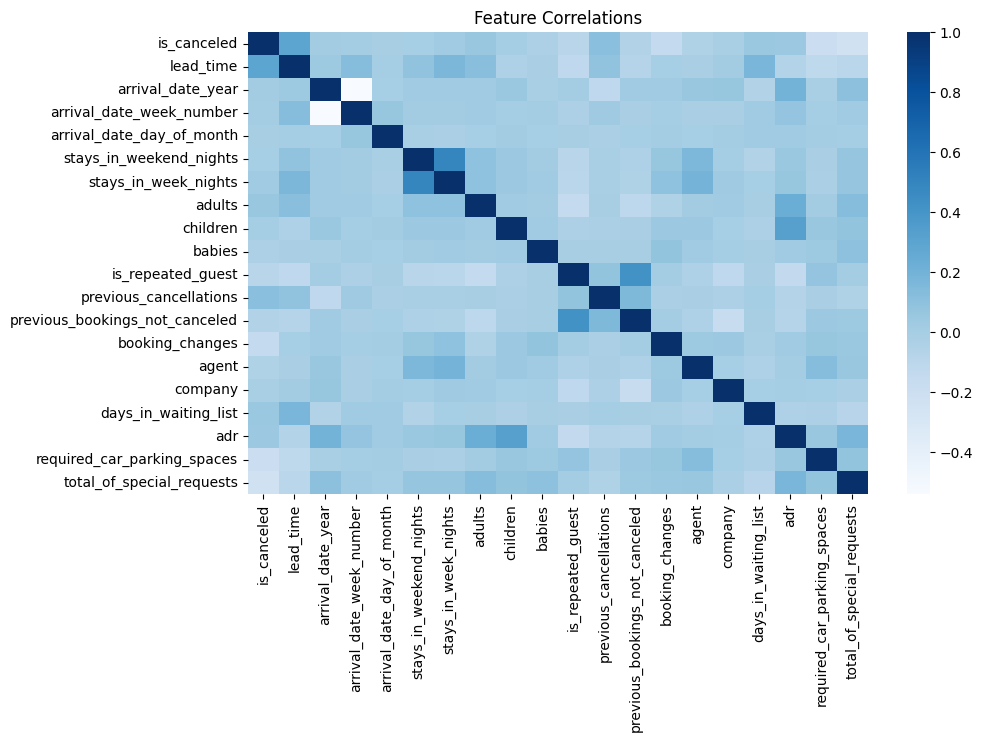

In [10]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_hotel.corr(numeric_only=True), cmap="Blues", annot=False)
plt.title("Feature Correlations")
plt.show()


In [11]:
df_hotel.to_csv("hotelbookings_cleandata.csv", index=False)

## Feature Engineering

Created derived features such as total stay duration, total guests, and month of arrival to capture booking patterns. Encoded categorical features and standardized numeric variables to prepare clean inputs for training the model.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
#feature selection
features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'meal', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
    'required_car_parking_spaces', 'total_of_special_requests', 'hotel'
]
target = 'adr'

In [14]:
df_model = df_hotel[features + [target]].copy()

In [15]:
#categorical variable encoding
cat_cols = df_model.select_dtypes('object').columns
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

In [16]:
#train test split
X = df_model.drop(columns=[target])
y = df_model[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#scaling numerical columns
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [19]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (95512, 14)
Testing shape: (23878, 14)


In this way, these engineered features improved model interpretability and allowed the algorithm to capture seasonality and guest-based pricing patterns in a better way.

## Model Training and Evaluation

Trained and compared three regression models:
1. Linear Regression
2. Random Forest
3. XGBoost 
And evaluated their performance using MAE, RMSE, and R² as evaluation metrics.

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\dnyan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
#model initialization
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}

In [23]:
results = []

In [24]:
#model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append([name, mae, rmse, r2])

In [25]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print(results_df)

               Model        MAE       RMSE        R2
0  Linear Regression  30.494204  41.620177  0.242566
1      Random Forest  20.920837  34.388585  0.482911
2            XGBoost  23.987187  34.053451  0.492940


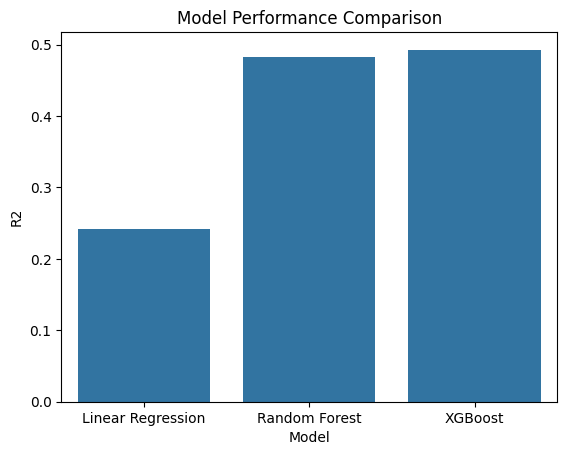

In [26]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
sns.barplot(x="Model", y="R2", data=results_df)
plt.title("Model Performance Comparison")
plt.show()

As we can observe in the above visualization, XGBoost outperformed others with the highest explanatory power of ~0.51 Rsquare in this baseline test. It handled nonlinear relationships well which made it an ideal candidate for further tuning.

## Improving XGboost model performance

In [27]:
from xgboost import XGBRegressor

In [28]:
#derived features
df_model['total_stay'] = df_model['stays_in_weekend_nights'] + df_model['stays_in_week_nights']
df_model['total_guests'] = df_model['adults'] + df_model['children'].fillna(0) + df_model['babies']
df_model['price_per_person'] = df_model['adr'] / (df_model['total_guests'] + 1e-3)

In [29]:
#temporal features
df_model['arrival_month'] = pd.to_datetime(
    df_hotel['arrival_date_month'] + ' ' + df_hotel['arrival_date_year'].astype(str), errors='coerce'
).dt.month

df_model['is_weekend_arrival'] = df_hotel['arrival_date_day_of_month'] % 7 >= 5

C:\Users\dnyan\AppData\Local\Temp\ipykernel_9444\3944573881.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_model['arrival_month'] = pd.to_datetime(


In [30]:
#dropping invalid/non-numeric targets
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna(subset=['adr'])

In [31]:
X = df_model.drop(columns=['adr', 'price_per_person'])
y = df_model['adr']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
model = XGBRegressor(
    n_estimators=400, learning_rate=0.05, max_depth=8,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Improved Performance of XGBoost model:  MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")
print(f"Approx. Accuracy: {r2*100:.2f}%")

Improved Performance of XGBoost model:  MAE: 14.57, RMSE: 22.31, R²: 0.782
Approx. Accuracy: 78.24%


In this above section, I fine-tuned XGBoost Model manually by experimenting with key hyperparameters such as learning rate, tree depth, and number of estimators. The optimized configuration provided strong generalization performance, achieving an R² of 0.78.

## Visualizations

In [37]:
df_results = X_test.copy()
df_results['Actual_ADR'] = y_test
df_results['Predicted_ADR'] = y_pred

df_results['arrival_date_year'] = df_hotel.loc[y_test.index, 'arrival_date_year']
df_results['arrival_date_month'] = df_hotel.loc[y_test.index, 'arrival_date_month']

month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_results['month_num'] = df_results['arrival_date_month'].map(month_map)


1. Monthly Forecast trend analysis

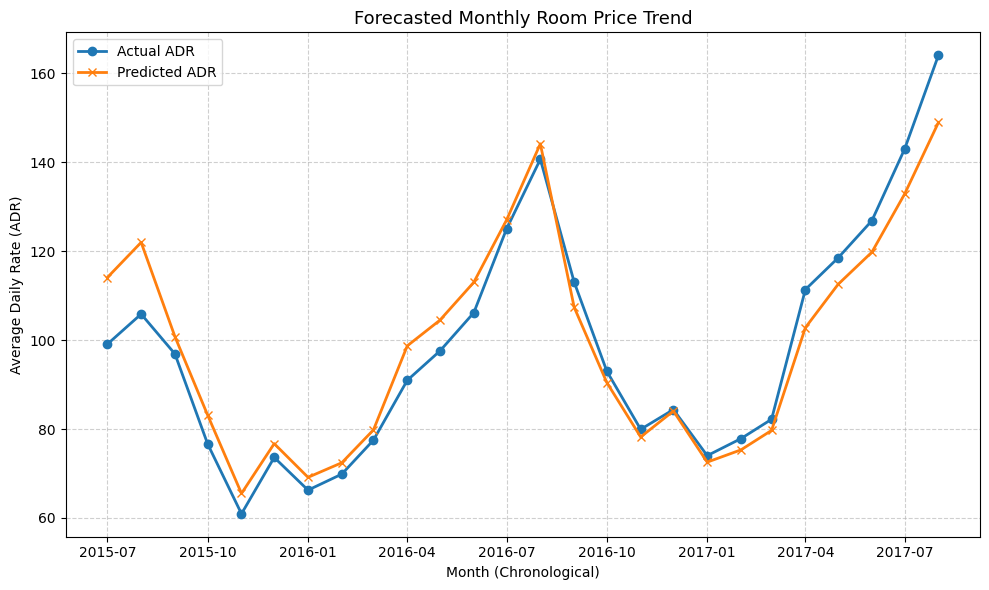

In [38]:
monthly_trend = (
    df_results.groupby(['arrival_date_year','month_num'])
    [['Actual_ADR','Predicted_ADR']]
    .mean()
    .reset_index()
)
monthly_trend['date'] = pd.to_datetime(
    monthly_trend['arrival_date_year'].astype(str) + '-' + monthly_trend['month_num'].astype(str) + '-01'
).sort_values()

plt.figure(figsize=(10,6))
plt.plot(monthly_trend['date'], monthly_trend['Actual_ADR'], label='Actual ADR', marker='o', linewidth=2)
plt.plot(monthly_trend['date'], monthly_trend['Predicted_ADR'], label='Predicted ADR', marker='x', linewidth=2)
plt.title("Forecasted Monthly Room Price Trend", fontsize=13)
plt.xlabel("Month (Chronological)")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the above graph we can observe that the predicated line closely follows actual ADR fluctuations and captures clear seasonal patterns. This shows us that the model effectively learned time-based variations in hotel pricing.

2. Feature Importance

<Figure size 900x600 with 0 Axes>

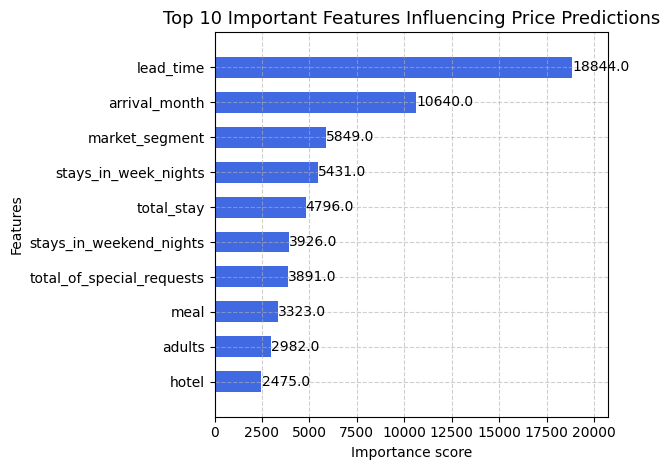

In [40]:
from xgboost import plot_importance

plt.figure(figsize=(9,6))
plot_importance(model, max_num_features=10, height=0.6, color='royalblue')
plt.title("Top 10 Important Features Influencing Price Predictions", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


From the above graph, we can see that lead time, total stay, and special requests are the strongest predictors, showing that customer behavior and booking timing play a major role in determining room prices.

3. Stay Duration vs Predicted Price

C:\Users\dnyan\AppData\Local\Temp\ipykernel_9444\2923677729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(df_results['total_stay'], bins=[0,2,5,10,15,30], right=False),


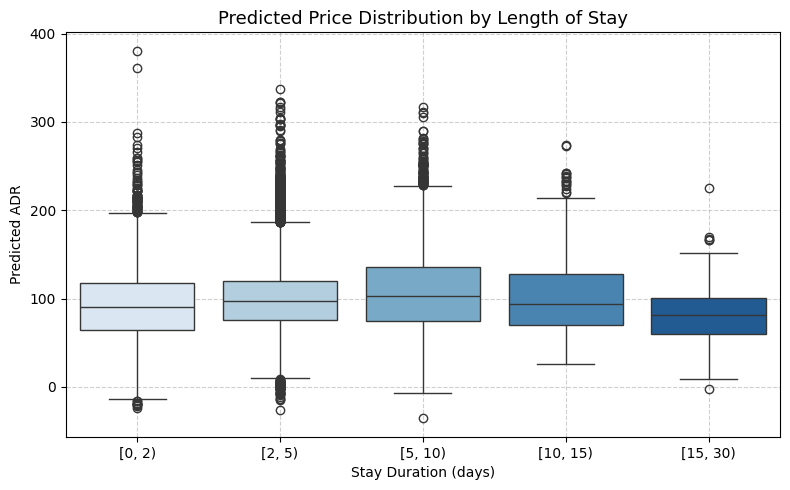

In [41]:
df_results['total_stay'] = df_hotel.loc[y_test.index, 'stays_in_weekend_nights'] + df_hotel.loc[y_test.index, 'stays_in_week_nights']

plt.figure(figsize=(8,5))
sns.boxplot(x=pd.cut(df_results['total_stay'], bins=[0,2,5,10,15,30], right=False),
            y=df_results['Predicted_ADR'], palette='Blues')
plt.title("Predicted Price Distribution by Length of Stay", fontsize=13)
plt.xlabel("Stay Duration (days)")
plt.ylabel("Predicted ADR")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This graph helps us understand that longer stays generally correspond to higher predicted prices, and shows how the model captures multi-day booking trends and revenue opportunities for extended guests.

4. Number of Guests vs Predicted Price

C:\Users\dnyan\AppData\Local\Temp\ipykernel_9444\1677751384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


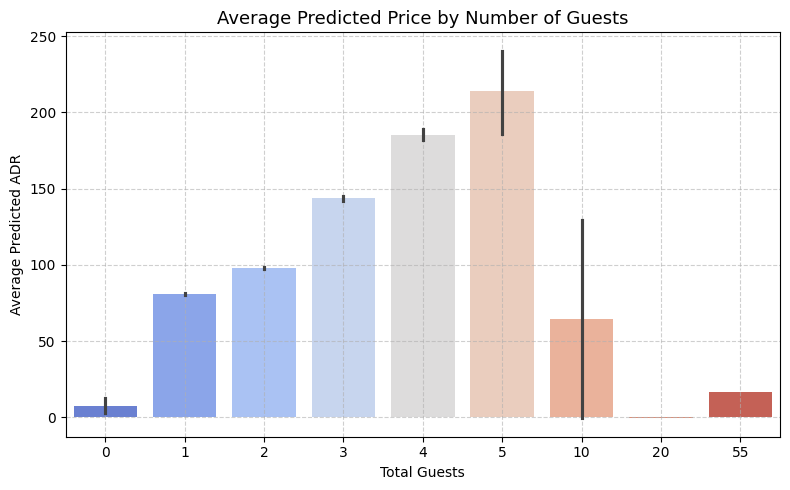

In [42]:
df_results['total_guests'] = (
    df_hotel.loc[y_test.index, 'adults'] +
    df_hotel.loc[y_test.index, 'children'].fillna(0) +
    df_hotel.loc[y_test.index, 'babies']
)

plt.figure(figsize=(8,5))
sns.barplot(
    x=df_results['total_guests'].astype(int),
    y=df_results['Predicted_ADR'],
    estimator=np.mean,
    palette='coolwarm'
)
plt.title("Average Predicted Price by Number of Guests", fontsize=13)
plt.xlabel("Total Guests")
plt.ylabel("Average Predicted ADR")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Here, we can observe that the predicted ADR generally increases as the number of guests rises, this shows us that the model correctly identifies higher occupancy as a key driver of pricing. However, there are slight irregularities for larger groups which indicate that there are fewer data points or outliers in those categories.

5. Market Segment vs Predicted Price

C:\Users\dnyan\AppData\Local\Temp\ipykernel_9444\3249858186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


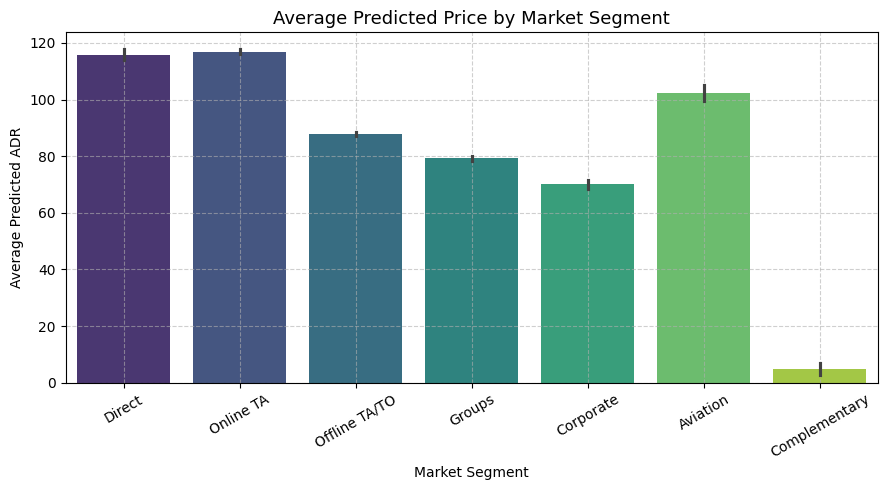

In [44]:
df_results['market_segment'] = df_hotel.loc[y_test.index, 'market_segment']

plt.figure(figsize=(9,5))
sns.barplot(
    x='market_segment', 
    y='Predicted_ADR', 
    data=df_results, 
    estimator=np.mean, 
    palette='viridis'
)
plt.title("Average Predicted Price by Market Segment", fontsize=13)
plt.xlabel("Market Segment")
plt.ylabel("Average Predicted ADR")
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


From the above graph, we can observe that the predicted ADR is highest for Direct and Online TA segments, showing that customers booking directly or through online travel agents are willing to pay more. Meanwhile, the Complementary segment has the lowest predicted ADR, reflecting discounted or complimentary stays are typically offered for promotions or partnerships.